# Assignment 2
Emilia Zielinska <br>
300018129 <br>
CSI 5341 <br>
Dr. Jochen Lang <br>
October 12, 2023

## Image Preprocessing
- utilize Sobel edge filter on each level of the image pyramid
- summarize the filtered texture image by a histogram with a fixed bin size of 256
- the final feature shape (complete histogram) over all the levels for each image should be [3 x 256]

In [14]:
from pathlib import Path

In [15]:
# Generate lists of filenames for the needed images

directory_testing_canvas = Path("./testing/canvas1")
directory_testing_cushion = Path("./testing/cushion1")
directory_testing_linsseeds = Path("./testing/linsseeds1")
directory_testing_sand = Path("./testing/sand1")
directory_testing_seat = Path("./testing/seat2")
directory_testing_stone = Path("./testing/stone1")

directory_training_canvas = Path("./training/canvas1")
directory_training_cushion = Path("./training/cushion1")
directory_training_linsseeds = Path("./training/linsseeds1")
directory_training_sand = Path("./training/sand1")
directory_training_seat = Path("./training/seat2")
directory_training_stone = Path("./training/stone1")

file_list_testing_canvas = [f for f in directory_testing_canvas.glob('**/*') if f.is_file()]
file_list_testing_cushion = [f for f in directory_testing_cushion.glob('**/*') if f.is_file()]
file_list_testing_linsseeds = [f for f in directory_testing_linsseeds.glob('**/*') if f.is_file()]
file_list_testing_sand = [f for f in directory_testing_sand.glob('**/*') if f.is_file()]
file_list_testing_seat = [f for f in directory_testing_seat.glob('**/*') if f.is_file()]
file_list_testing_stone = [f for f in directory_testing_stone.glob('**/*') if f.is_file()]

file_list_training_canvas = [f for f in directory_training_canvas.glob('**/*') if f.is_file()]
file_list_training_cushion = [f for f in directory_training_cushion.glob('**/*') if f.is_file()]
file_list_training_linsseeds = [f for f in directory_training_linsseeds.glob('**/*') if f.is_file()]
file_list_training_sand = [f for f in directory_training_sand.glob('**/*') if f.is_file()]
file_list_training_seat = [f for f in directory_training_seat.glob('**/*') if f.is_file()]
file_list_training_stone = [f for f in directory_training_stone.glob('**/*') if f.is_file()]

In [16]:
from skimage import exposure
from skimage.filters import gaussian
from skimage.transform import pyramid_gaussian

In [17]:
# Function to preprocess an image
def preprocess(img):
    # Histogram equalization
    img = exposure.equalize_hist(img)
    # Gaussian smoothing
    img = gaussian(img)
    # Build an image pyramid for each image with 3 levels of downsampling by a factor of 2
    pyramid = tuple(pyramid_gaussian(img, max_layer=2, downscale=2))
    return pyramid

In [18]:
import matplotlib.pyplot as plt
import numpy as np

In [19]:
# A function to generate the composite image of a pyramid
# Code was taken from https://scikit-image.org/docs/stable/auto_examples/transform/plot_pyramid.html
def composite(img, pyramid):
    rows, cols = img.shape
    composite_rows = max(rows, sum(p.shape[0] for p in pyramid[1:]))
    composite_cols = cols + pyramid[1].shape[1]
    composite_image = np.zeros((composite_rows, composite_cols),
                               dtype=np.double)
    composite_image[:rows, :cols] = pyramid[0]
    i_row = 0
    for p in pyramid[1:]:
        n_rows, n_cols = p.shape[:2]
        composite_image[i_row:i_row + n_rows, cols:cols + n_cols] = p
        i_row += n_rows
    fig, ax = plt.subplots()
    ax.imshow(composite_image)
    plt.show()

In [20]:
from skimage.io import imread

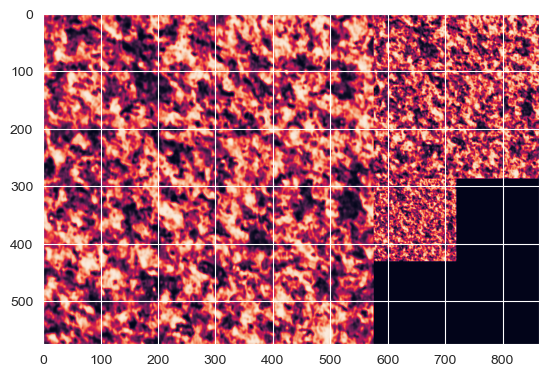

Sample pyramid shape: [(576, 576), (288, 288), (144, 144)]


In [32]:
pyramid_testing_canvas = []
for f in file_list_testing_canvas:
    img = imread(f)
    pyramid = preprocess(img)
    pyramid_testing_canvas.append(pyramid)

pyramid_testing_cushion = []
for f in file_list_testing_cushion:
    img = imread(f)
    pyramid = preprocess(img)
    pyramid_testing_cushion.append(pyramid)

pyramid_testing_linsseeds = []
for f in file_list_testing_linsseeds:
    img = imread(f)
    pyramid = preprocess(img)
    pyramid_testing_linsseeds.append(pyramid)

pyramid_testing_sand = []
for f in file_list_testing_sand:
    img = imread(f)
    pyramid = preprocess(img)
    pyramid_testing_sand.append(pyramid)

pyramid_testing_seat = []
for f in file_list_testing_seat:
    img = imread(f)
    pyramid = preprocess(img)
    pyramid_testing_seat.append(pyramid)

pyramid_testing_stone = []
for f in file_list_testing_stone:
    img = imread(f)
    pyramid = preprocess(img)
    pyramid_testing_stone.append(pyramid)

pyramid_training_canvas = []
for f in file_list_training_canvas:
    img = imread(f)
    pyramid = preprocess(img)
    pyramid_training_canvas.append(pyramid)

pyramid_training_cushion = []
for f in file_list_training_cushion:
    img = imread(f)
    pyramid = preprocess(img)
    pyramid_training_cushion.append(pyramid)

pyramid_training_linsseeds = []
for f in file_list_training_linsseeds:
    img = imread(f)
    pyramid = preprocess(img)
    pyramid_training_linsseeds.append(pyramid)

pyramid_training_sand = []
for f in file_list_training_sand:
    img = imread(f)
    pyramid = preprocess(img)
    pyramid_training_sand.append(pyramid)

pyramid_training_seat = []
for f in file_list_training_seat:
    img = imread(f)
    pyramid = preprocess(img)
    pyramid_training_seat.append(pyramid)

pyramid_training_stone = []
for f in file_list_training_stone:
    img = imread(f)
    pyramid = preprocess(img)
    pyramid_training_stone.append(pyramid)
    
# Visualize one example in the notebook
composite(img, pyramid)
print("Sample pyramid shape: [" + str(pyramid[0].shape) + ", " + str(pyramid[1].shape) + ", " + str(pyramid[2].shape) + "]")

In [50]:
from skimage.exposure import histogram
from skimage.filters import sobel

In [ ]:
sobel_testing_canvas = []
histogram_testing_canvas = []
for pyramid in pyramid_testing_canvas:
    pyr = []
    his = []
    for image in pyramid:
        # Apply Sobel edge filter to image
        img = sobel(image)
        pyr.append(img)
        # Create a histogram for the image with a fixed bin size of 256
        h = histogram(img, nbins=256)
        his.append(h)
    sobel_testing_canvas.append(pyr)
    histogram_testing_canvas.append(his)

sobel_testing_cushion = []
histogram_testing_cushion = []
for pyramid in pyramid_testing_cushion:
    pyr = []
    his = []
    for image in pyramid:
        img = sobel(image)
        pyr.append(img)
        h = histogram(img, nbins=256)
        his.append(h)
    sobel_testing_cushion.append(pyr)
    histogram_testing_cushion.append(his)

sobel_testing_linsseeds = []
histogram_testing_linsseeds = []
for pyramid in pyramid_testing_linsseeds:
    pyr = []
    his = []
    for image in pyramid:
        img = sobel(image)
        pyr.append(img)
        h = histogram(img, nbins=256)
        his.append(h)
    sobel_testing_linsseeds.append(pyr)
    histogram_testing_linsseeds.append(his)

sobel_testing_sand = []
histogram_testing_sand = []
for pyramid in pyramid_testing_sand:
    pyr = []
    his = []
    for image in pyramid:
        img = sobel(image)
        pyr.append(img)
        h = histogram(img, nbins=256)
        his.append(h)
    sobel_testing_sand.append(pyr)
    histogram_testing_sand.append(his)

sobel_testing_seat = []
histogram_testing_seat = []
for pyramid in pyramid_testing_seat:
    pyr = []
    his = []
    for image in pyramid:
        img = sobel(image)
        pyr.append(img)
        h = histogram(img, nbins=256)
        his.append(h)
    sobel_testing_seat.append(pyr)
    histogram_testing_seat.append(his)

sobel_testing_stone = []
histogram_testing_stone = []
for pyramid in pyramid_testing_stone:
    pyr = []
    his = []
    for image in pyramid:
        img = sobel(image)
        pyr.append(img)
        h = histogram(img, nbins=256)
        his.append(h)
    sobel_testing_stone.append(pyr)
    histogram_testing_stone.append(his)

sobel_training_canvas = []
histogram_training_canvas = []
for pyramid in pyramid_training_canvas:
    pyr = []
    his = []
    for image in pyramid:
        img = sobel(image)
        pyr.append(img)
        h = histogram(img, nbins=256)
        his.append(h)
    sobel_training_canvas.append(pyr)
    histogram_training_canvas.append(his)

sobel_training_cushion = []
histogram_training_cushion = []
for pyramid in pyramid_training_cushion:
    pyr = []
    his = []
    for image in pyramid:
        img = sobel(image)
        pyr.append(img)
        h = histogram(img, nbins=256)
        his.append(h)
    sobel_training_cushion.append(pyr)
    histogram_training_cushion.append(his)

sobel_training_linsseeds = []
histogram_training_linsseeds = []
for pyramid in pyramid_training_linsseeds:
    pyr = []
    his = []
    for image in pyramid:
        img = sobel(image)
        pyr.append(img)
        h = histogram(img, nbins=256)
        his.append(h)
    sobel_training_linsseeds.append(pyr)
    histogram_training_linsseeds.append(his)

sobel_training_sand = []
histogram_training_sand = []
for pyramid in pyramid_training_sand:
    pyr = []
    his = []
    for image in pyramid:
        img = sobel(image)
        pyr.append(img)
        h = histogram(img, nbins=256)
        his.append(h)
    sobel_training_sand.append(pyr)
    histogram_training_sand.append(his)

sobel_training_seat = []
histogram_training_seat = []
for pyramid in pyramid_training_seat:
    pyr = []
    his = []
    for image in pyramid:
        img = sobel(image)
        pyr.append(img)
        h = histogram(img, nbins=256)
        his.append(h)
    sobel_training_seat.append(pyr)
    histogram_training_seat.append(his)

sobel_training_stone = []
histogram_training_stone = []
for pyramid in pyramid_training_stone:
    pyr = []
    his = []
    for image in pyramid:
        img = sobel(image)
        pyr.append(img)
        h = histogram(img, nbins=256)
        his.append(h)
    sobel_training_stone.append(pyr)
    histogram_training_stone.append(his)